In [1]:
# base
import numpy as np
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink

# viz
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# feems
from feems.utils import prepare_graph_inputs
from feems import SpatialGraph, Viz

# change matplotlib fonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

/tmp/ipykernel_3881685/3635119735.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
#Load data
(bim, fam, G) = read_plink("CM023248.thin0.1.allinds_50.10.0.1.pruned.bed")
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
genotypes = imp.fit_transform((np.array(G)).T)
print("n_samples={}, n_snps={}".format(genotypes.shape[0], genotypes.shape[1]))

#subset to invasive samples, get coords
import pandas as pd
df_samples = pd.read_csv('/home/dennist/lstm_data/cease/AsGARD/metadata/cease_combinedmetadata.qcpass.20240914.txt', sep='\t')
df_samples = df_samples.query('country == "Sudan" | country == "Yemen" | country == "Ethiopia" | country == "Djibouti" | country == "SaudiArabia"')



coord = df_samples[['longitude', 'latitude']].to_numpy()

#Subset genos
indices_keep = list(df_samples['callset_order'])
genotypes = np.take(genotypes, indices_keep, 0)

#get seg sites only
segbool = np.sum(genotypes, axis=0) < genotypes.shape[0] * 2

genotypes = genotypes[:, segbool]


Mapping files:   0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_3881685/1343274792.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  (bim, fam, G) = read_plink("CM023248.thin0.1.allinds_50.10.0.1.pruned.bed")
Mapping files:  33%|███▎      | 1/3 [00:00<00:00,  2.27it/s]/tmp/ipykernel_3881685/1343274792.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  (bim, fam, G) = read_plink("CM023248.thin0.1.allinds_50.10.0.1.pruned.bed")
Mapping files: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]


n_samples=475, n_snps=226957


In [31]:

sudan_crop_outline = pd.read_csv('hoa_ksa_outline.csv', header=None).to_numpy()

grid_path = "hoa_ksa_outline.tri.50k.shp"  # path to discrete global grid

outer, edges, grid, _ = prepare_graph_inputs(coord=coord, 
                                             ggrid=grid_path,
                                             translated=False, 
                                             buffer=0,
                                             outer=sudan_crop_outline)

sp_graph = SpatialGraph(genotypes, coord, grid, edges, scale_snps=True)

/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


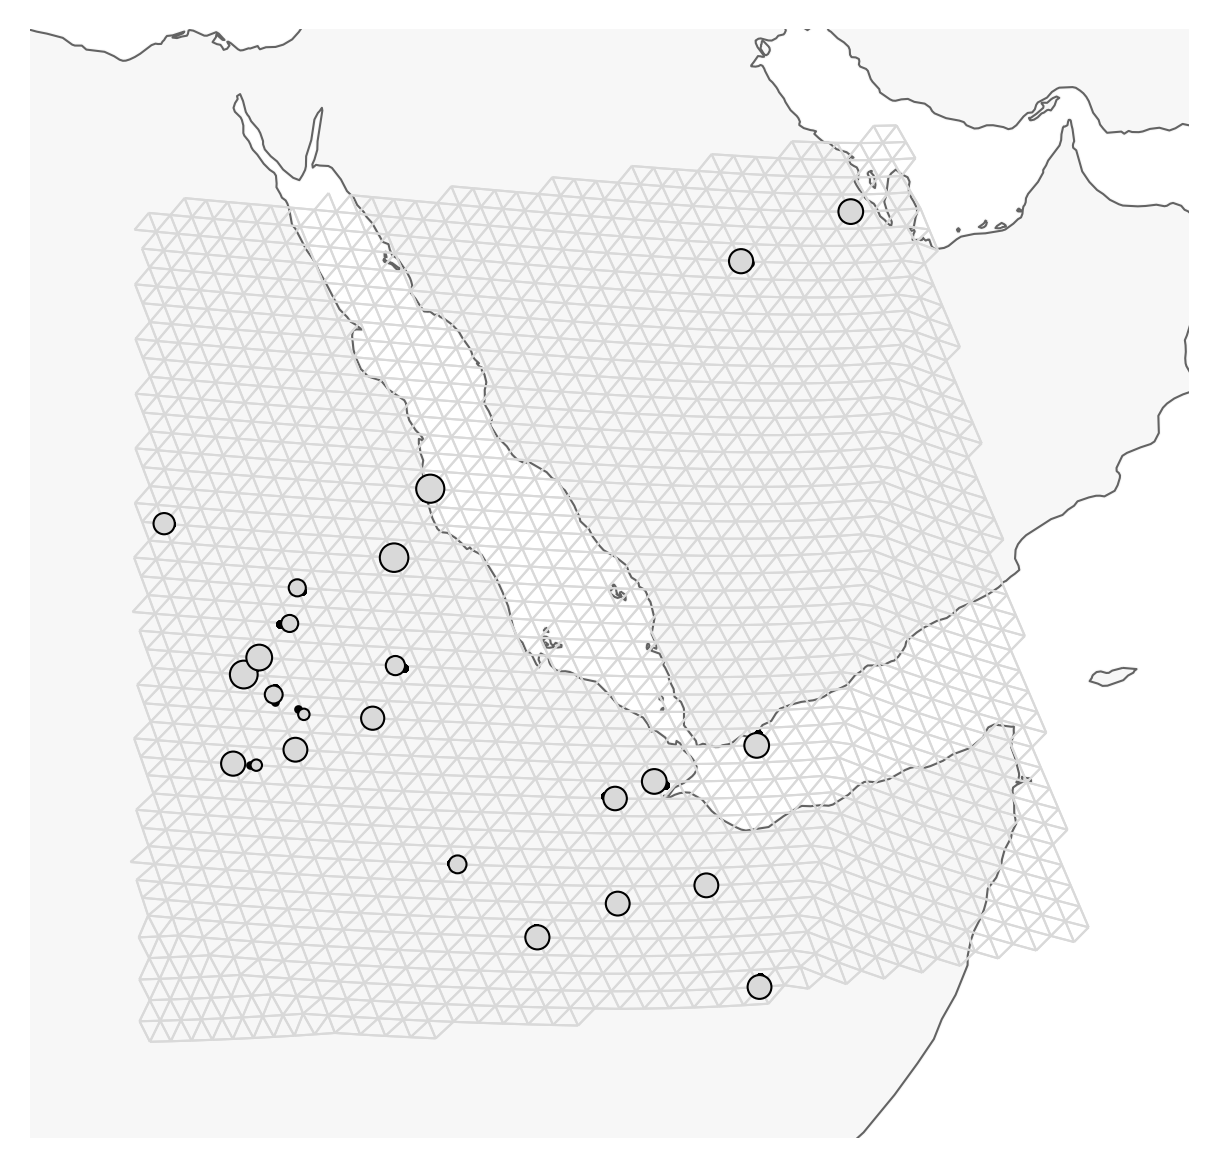

In [32]:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes

GeoAxes._pcolormesh_patched = Axes.pcolormesh

projection = ccrs.EquidistantConic(central_longitude=30.10921958480732, central_latitude=15.874172562000085)
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=projection)  
v = Viz(ax, sp_graph, projection=projection, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=10, 
        obs_node_size=7.5, sample_pt_color="black", 
        cbar_font_size=10)
ax._autoscaleXon = False
ax._autoscaleYon = False

v.draw_map()
v.draw_samples()
v.draw_edges(use_weights=False)
v.draw_obs_nodes(use_ids=False)

In [33]:
sp_graph.fit(lamb=20.0)

constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100
lambda=20.0000000, alpha=0.8708165, converged in 273 iterations, train_loss=-597401.5099260


/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


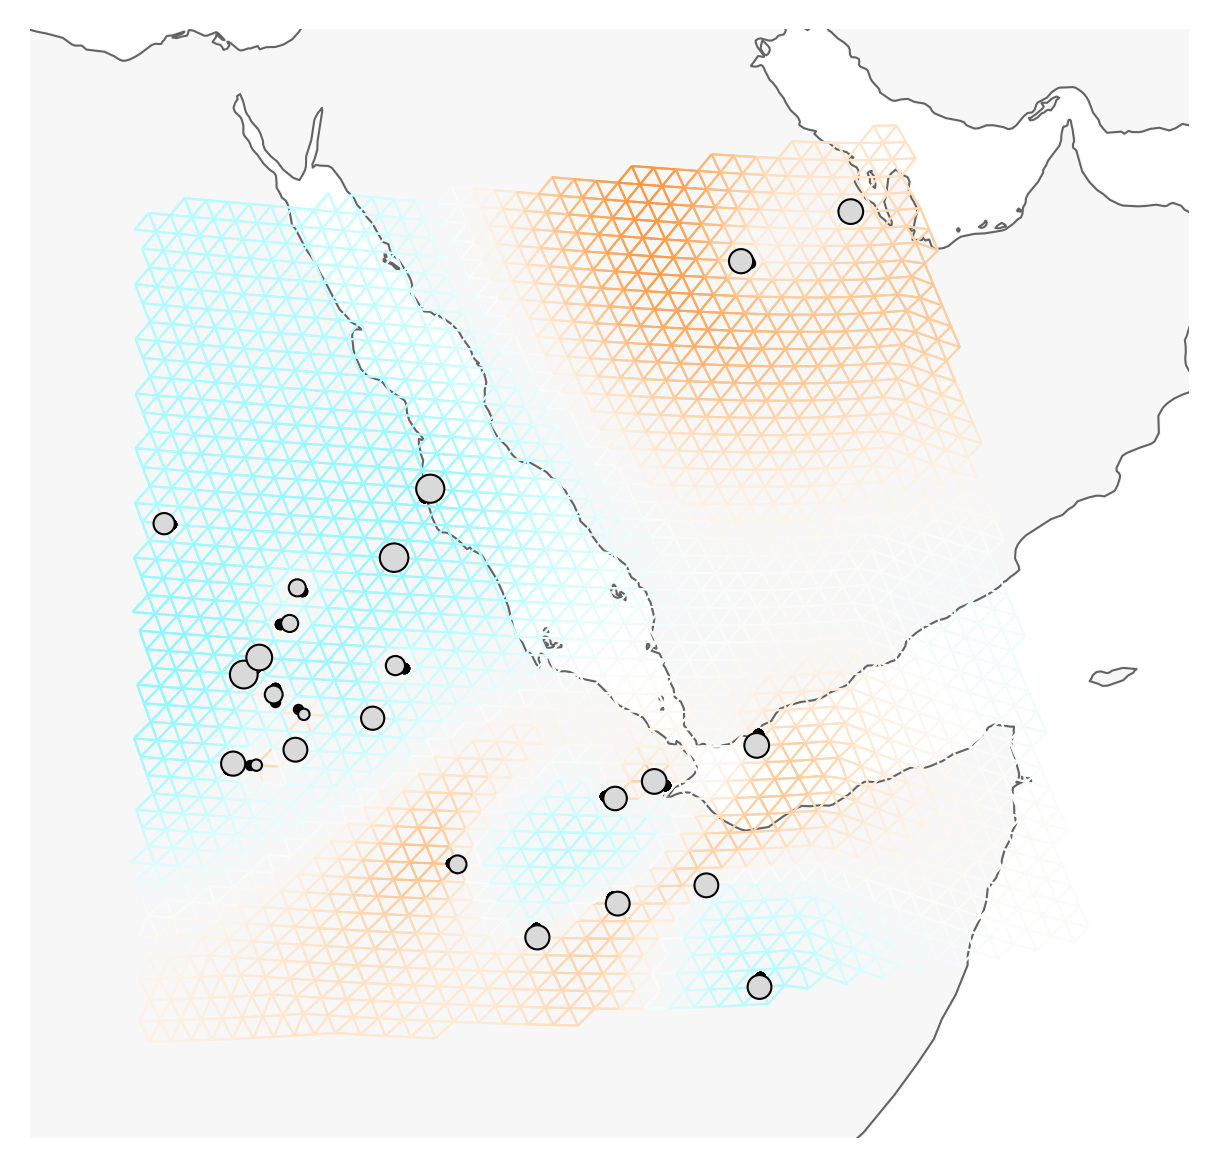

In [34]:
from feems import SpatialGraph, Viz
#sp_graph.fit(lamb=20.0)å
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=projection) 
ax._autoscaleXon = False
ax._autoscaleYon = False
v = Viz(ax, sp_graph, projection=projection, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=7.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_samples()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
#v.draw_edge_colorbar()

## Crossvalidation


Start with all samples


In [35]:
from feems.cross_validation import run_cv

# define grids

# reverse the order of lambdas and alphas for warmstart
lamb_grid = np.geomspace(1e-6, 1e2, 20)[::-1]

# run cross-validation
cv_err = run_cv(sp_graph, lamb_grid, n_folds=sp_graph.n_observed_nodes, factr=1e10)

# average over folds
mean_cv_err = np.mean(cv_err, axis=0)

# argmin of cv error
lamb_cv = float(lamb_grid[np.argmin(mean_cv_err)])



 fold= 0
iteration lambda=20/20 alpha=1/1
 fold= 1
iteration lambda=20/20 alpha=1/1
 fold= 2
iteration lambda=20/20 alpha=1/1
 fold= 3
iteration lambda=20/20 alpha=1/1
 fold= 4
iteration lambda=20/20 alpha=1/1
 fold= 5
iteration lambda=20/20 alpha=1/1
 fold= 6
iteration lambda=20/20 alpha=1/1
 fold= 7
iteration lambda=20/20 alpha=1/1
 fold= 8
iteration lambda=20/20 alpha=1/1
 fold= 9
iteration lambda=20/20 alpha=1/1
 fold= 10
iteration lambda=20/20 alpha=1/1
 fold= 11
iteration lambda=20/20 alpha=1/1
 fold= 12
iteration lambda=20/20 alpha=1/1
 fold= 13
iteration lambda=20/20 alpha=1/1
 fold= 14
iteration lambda=20/20 alpha=1/1
 fold= 15
iteration lambda=20/20 alpha=1/1
 fold= 16
iteration lambda=20/20 alpha=1/1
 fold= 17
iteration lambda=20/20 alpha=1/1
 fold= 18
iteration lambda=20/20 alpha=1/1
 fold= 19
iteration lambda=20/20 alpha=1/1
 fold= 20
iteration lambda=20/20 alpha=1/1
 fold= 21
iteration lambda=20/20 alpha=1/1
 fold= 22
iteration lambda=20/20 alpha=1/1
 fold= 23
iteration 

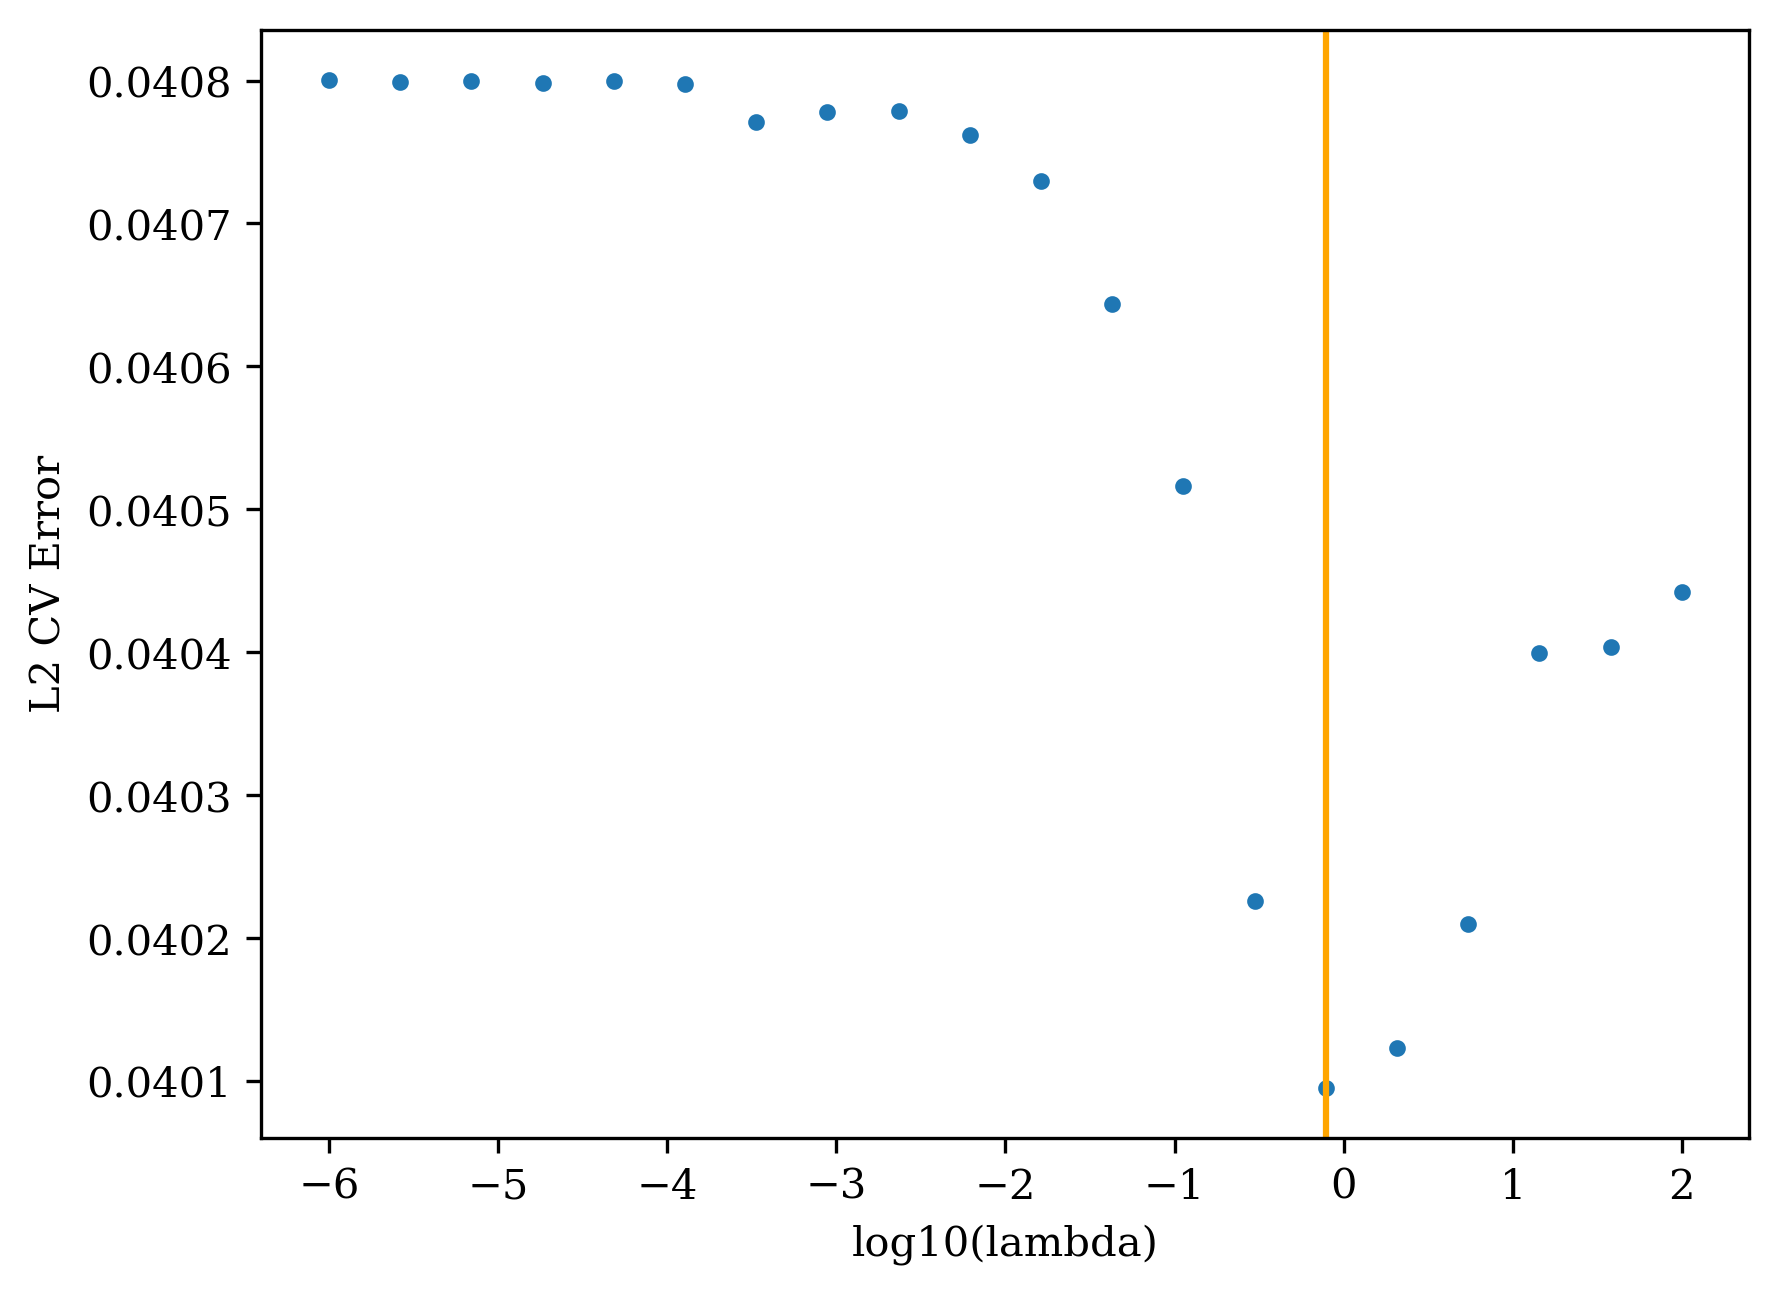

In [36]:
fig, ax = plt.subplots(dpi=300)
ax.plot(np.log10(lamb_grid), mean_cv_err, ".");
ax.set_xlabel("log10(lambda)");
ax.set_ylabel("L2 CV Error");
ax.axvline(np.log10(lamb_cv), color = "orange")

constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100


lambda=100.0000000, alpha=0.8708165, converged in 243 iterations, train_loss=-544584.3763787
constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100
lambda=5.4555948, alpha=0.8708165, converged in 468 iterations, train_loss=-624476.3154524
constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100
lambda=0.7847600, alpha=0.8708165, converged in 1108 iterations, train_loss=-646526.0307899
constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100
lambda=0.0061585, alpha=0.8708165, converged in 4187 iterations, train_loss=-659352.0801828


Text(0.2, 0.85, 'lambda=0.00616\ncv l2 error=0.04076')

/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/dennist/miniconda3/envs/feem

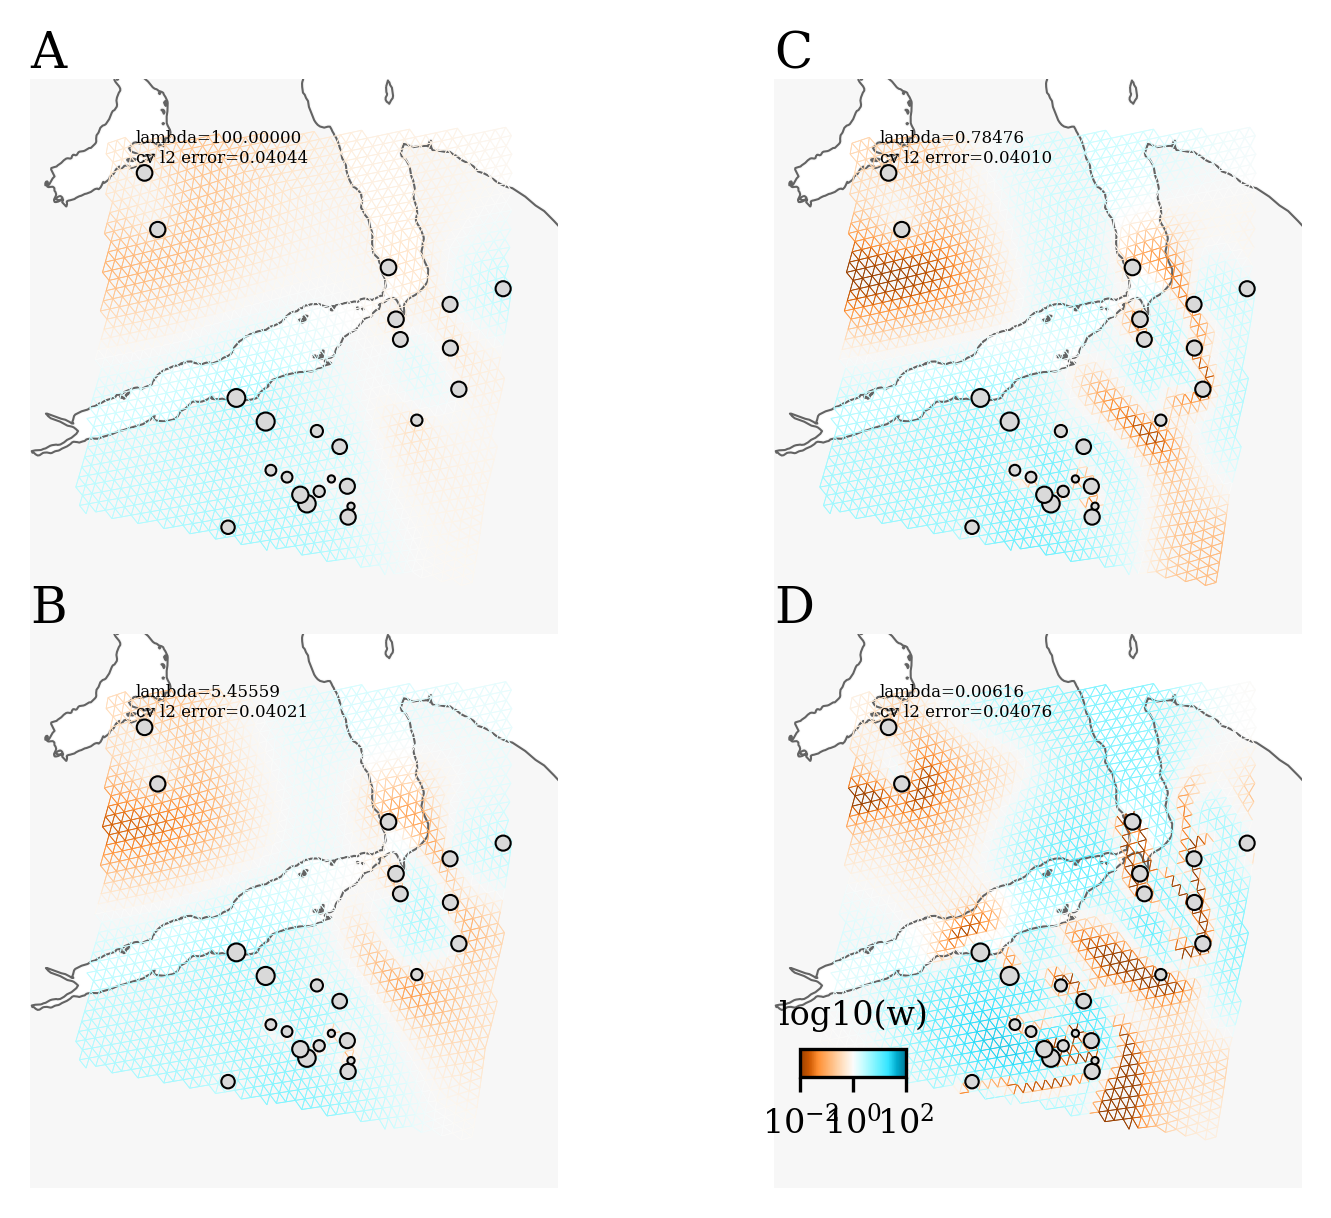

In [37]:

from matplotlib import gridspec

# figure params
projection = ccrs.EquidistantConic(central_longitude=-108.842926, central_latitude=66.037547)
title_loc = "left"
title_pad = "-10"
title_fontsize = 12
edge_width = .2
edge_alpha = 1
edge_zorder = 3
obs_node_size = 3
obs_node_linewidth = .4
cbar_font_size = 8
cbar_ticklabelsize = 8
cbar_orientation = "horizontal"

# figure setup
fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.0, hspace=0.0)

# axis 00 
ax_00 = fig.add_subplot(spec[0, 0], projection=projection)
ax_00._autoscaleXon = False
ax_00._autoscaleYon = False
ax_00.set_title("A", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
sp_graph.fit(float(lamb_grid[0]))
v = Viz(ax_00, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
ax_00.text(.2, .85, "lambda={:.5f}\ncv l2 error={:.5f}".format(lamb_grid[0], mean_cv_err[0, 0]), 
           fontdict={"fontsize": 4}, transform = ax_00.transAxes)

# axis 10
ax_10 = fig.add_subplot(spec[1, 0], projection=projection)
ax_10._autoscaleXon = False
ax_10._autoscaleYon = False
ax_10.set_title("B", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
sp_graph.fit(float(lamb_grid[3]))
v = Viz(ax_10, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20,
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
ax_10.text(.2, .85, "lambda={:.5f}\ncv l2 error={:.5f}".format(lamb_grid[3], mean_cv_err[3, 0]), 
           fontdict={"fontsize": 4}, transform = ax_10.transAxes)

# axis 01
ax_01 = fig.add_subplot(spec[0, 1], projection=projection)
ax_01._autoscaleXon = False
ax_01._autoscaleYon = False
ax_01.set_title("C", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
sp_graph.fit(float(lamb_cv))
v = Viz(ax_01, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
ax_01.text(.2, .85, "lambda={:.5f}\ncv l2 error={:.5f}".format(lamb_cv, mean_cv_err[np.argmin(mean_cv_err), 0]), 
           fontdict={"fontsize": 4}, transform = ax_01.transAxes)

# axis 11
ax_11 = fig.add_subplot(spec[1, 1], projection=projection)
ax_11._autoscaleXon = False
ax_11._autoscaleYon = False
ax_11.set_title("D", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
sp_graph.fit(float(lamb_grid[10]))
v = Viz(ax_11, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False)
v.cbar_font_size = cbar_font_size
v.cbar_orientation = cbar_orientation
v.cbar_ticklabelsize = cbar_ticklabelsize
v.draw_edge_colorbar()
ax_11.text(.2, .85, "lambda={:.5f}\ncv l2 error={:.5f}".format(lamb_grid[10], mean_cv_err[10, 0]), 
           fontdict={"fontsize": 4}, transform = ax_11.transAxes)

constant-w/variance fit, converged in 124 iterations, train_loss=23928.9170100
lambda=0.7847600, alpha=0.8708165, converged in 1108 iterations, train_loss=-646526.0307899


/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/dennist/miniconda3/envs/feems/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


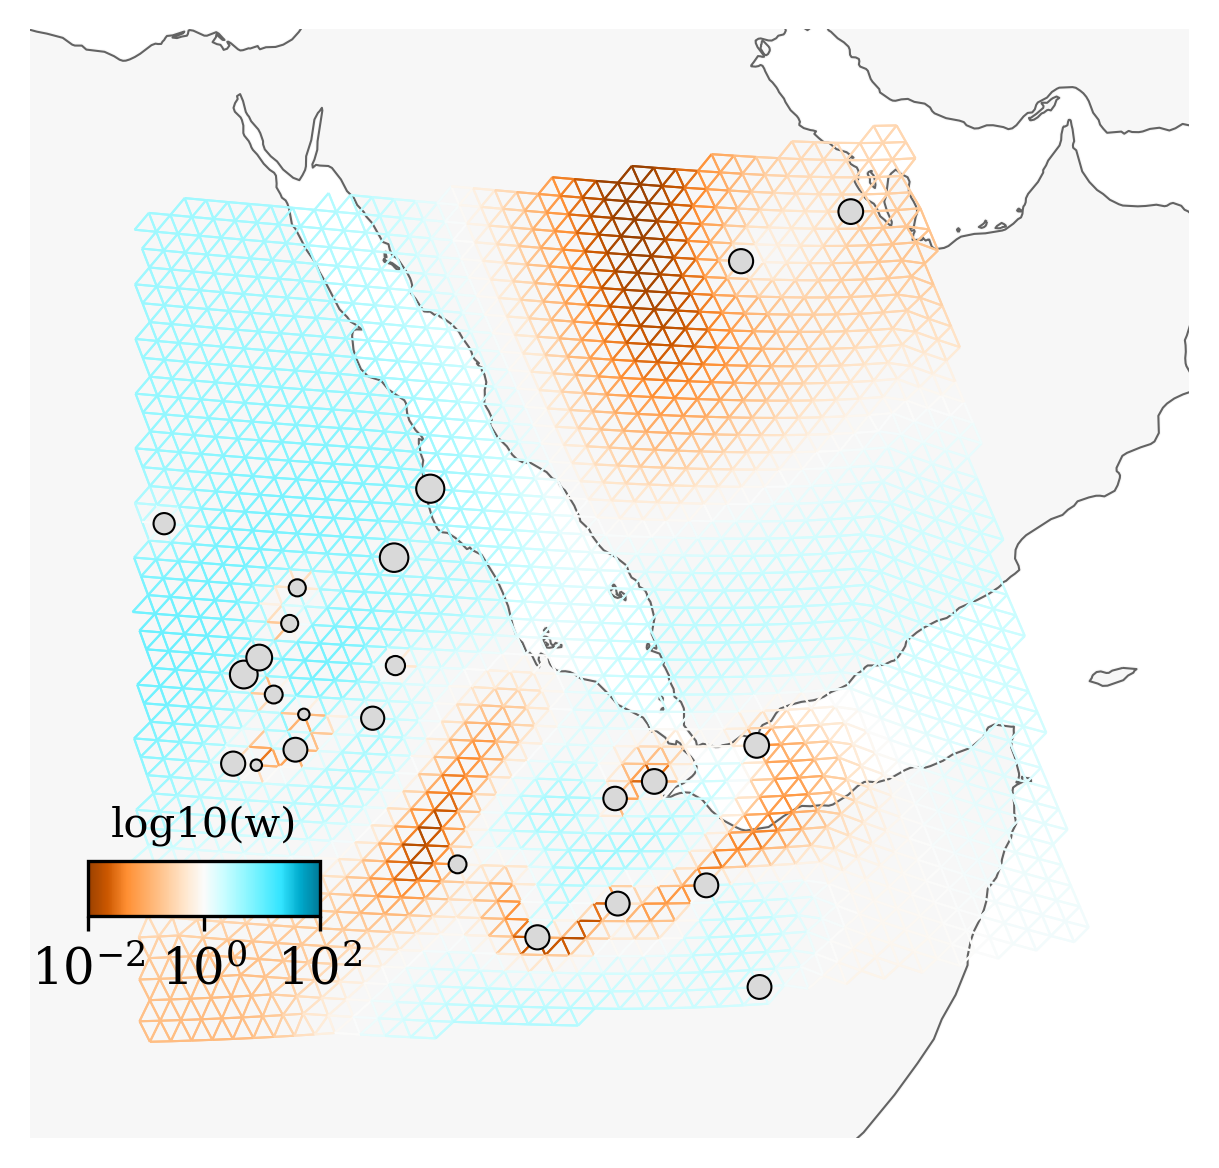

In [38]:
# re-fit
sp_graph.fit(lamb_cv)
projection = ccrs.EquidistantConic(central_longitude=30.10921958480732, central_latitude=15.874172562000085)

# plot
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=projection)  
ax._autoscaleXon = False
ax._autoscaleYon = False
v = Viz(ax, sp_graph, projection=projection, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=7.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
v.draw_edge_colorbar()

In [4]:
# in python
# write the deme coordinates + sample size (node attributes) out into a csv file
np.savetxt('incksanodepos.csv', np.vstack((sp_graph.node_pos.T, [sp_graph.nodes[n]['n_samples'] for n in range(len(sp_graph.nodes))])).T, delimiter=',') 
# write the relevant edge weights out into a csv file
np.savetxt('incksaedgew.csv', np.vstack((np.array(sp_graph.edges).T, sp_graph.w)).T, delimiter=',')

NameError: name 'sp_graph' is not defined

This looks quite overfitted. Lots going on in the data (e.g. not continuous sampling, )
